#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [15]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [19]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

## 請分別選用 "binary _crossentropy", "MSE", 查看Train/test accurancy and loss rate¶


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 48s 1ms/step - loss: 0.2320 - accuracy: 0.9124 - val_loss: 0.2075 - val_accuracy: 0.9166
Epoch 2/12
37500/37500 [==============================] - 47s 1ms/step - loss: 0.1833 - accuracy: 0.9281 - val_loss: 0.1813 - val_accuracy: 0.9287
Epoch 3/12
37500/37500 [==============================] - 47s 1ms/step - loss: 0.1640 - accuracy: 0.9358 - val_loss: 0.1678 - val_accuracy: 0.9352
Epoch 4/12
37500/37500 [==============================] - 47s 1ms/step - loss: 0.1495 - accuracy: 0.9409 - val_loss: 0.1627 - val_accuracy: 0.9361
Epoch 5/12
37500/37500 [==============================] - 47s 1ms/step - loss: 0.1361 - accuracy: 0.9465 - val_loss: 0.1487 - val_accuracy: 0.9420
Epoch 6/12
37500/37500 [==============================] - 48s 1ms/step - loss: 0.1254 - accuracy: 0.9512 - val_loss: 0.1414 - val_accuracy: 0.9456
Epoch 7/12
37500/37500 [==============================] - 47s 1ms/st

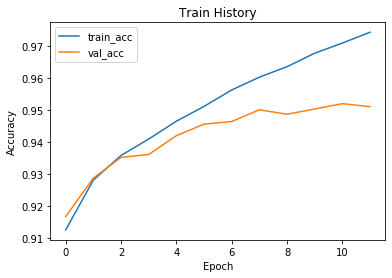

In [20]:
#模型編譯
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('accuracy','val_accuracy')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0177 - accuracy: 0.8789 - val_loss: 0.0364 - val_accuracy: 0.7362
Epoch 2/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0163 - accuracy: 0.8890 - val_loss: 0.0364 - val_accuracy: 0.7374
Epoch 3/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0148 - accuracy: 0.9003 - val_loss: 0.0361 - val_accuracy: 0.7409
Epoch 4/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0141 - accuracy: 0.9046 - val_loss: 0.0374 - val_accuracy: 0.7351
Epoch 5/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0133 - accuracy: 0.9106 - val_loss: 0.0366 - val_accuracy: 0.7352
Epoch 6/12
37500/37500 [==============================] - 51s 1ms/step - loss: 0.0123 - accuracy: 0.9179 - val_loss: 0.0365 - val_accuracy: 0.7381
Epoch 7/12
37500/37500 [==============================] - 51s 1ms/st

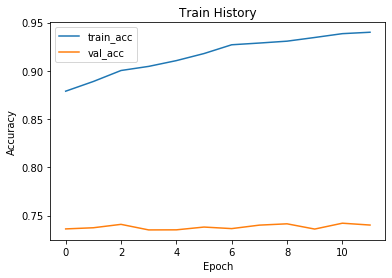

In [21]:
#模型編譯
model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('accuracy','val_accuracy')

##### 結論 : 以binary_crossentropy及MSE做為損失函數來比較, 不論optimizer是adam還是sgd, binary_crossentropy都有較高的準確度